---
title: "Modeling a Coin Flip Game"
author: "Josh Pearlson"
date: "2024-08-16"
categories: [python, analysis]
css: style.css
---

If you flip a coin until you decide to stop and you want to maximize the ratio of heads to total flips, what is the expected ratio?

## Coin Flip Game

This is a program I made to simulate a game I came across preparing for job interviews. The idea of the game is this: <br><br> If you flip a coin until you decide to stop and you want to maximize the ratio of heads to total flips, what is the expected ratio?


## My strategy

At first glace the problem seems easy, but as you start modeling you realize it is quite complicated. Initially I came up with a maximum ratio .75 as my estimate. This comes from the idea that there is a 50% chance we get heads on our first flip (a ratio of 1 heads / 1 total flips = 100%) and stop, or a 50% chance we get tails then keep flipping till in the long run we get a ratio of .5 (since we expect to get 1 heads for every 2 flips we do).<br><br> This will give us $.5*1 + .5*.5 = .75$ <br>

Now lets go and try to model this idea and see if we can improve on it at all: <br>

- if we have greater than some stopRatio X of heads/totalFlips (my intuition tells me this should be .50 since that is the long run ev) we will stop 
    - if we do not hit this threshold we just keep flipping till we do

- Model out which number works best as a stopRatio X to set as a threshold for achieving the best results possible

- To avoid recursive depth problems with python if we have flipped more than 1000 times in a single simulation I will equate this to a ratio of max(currentRatio, .5) since if we keep flipping till infinity we approach a ratio of .5 heads to total flips. 



In [204]:
import random
import pandas as pd
from datetime import datetime

In [205]:

def runFlipSimulation(numRuns:int, stopRatio:float) -> float:
    averageSimulationOutcome = 0
    for i in range(numRuns):
        averageSimulationOutcome += (runSingleSimulation(0,0,stopRatio)/numRuns)
    
    return round(averageSimulationOutcome,4)

def runSingleSimulation(numPreviousFlips:int,numHeads:int,stopRatio:float) -> float:
    # here we are calling 0 tails and 1 heads
    coin_flip = random.randint(0,1)
    numPreviousFlips+=1

    if coin_flip == 1:
        numHeads+=1
    
    currentRatio = numHeads/numPreviousFlips

    if currentRatio > stopRatio:
        return currentRatio

    # if depth >1000 then lets call it .5 as the ratio (long run result anyway)
    # this depth limit stops us from bricking python 
    if numPreviousFlips>=1000:
        # Either return current ratio or long run ratio of .5
        return max(.5,currentRatio)
    
    return runSingleSimulation(numPreviousFlips,numHeads,stopRatio)

In [206]:
# This method will run tests with stopRatio being between 50% and 60% inclusive steping by 1% with every new test
def run_ten_stopNumber_tests() -> pd.DataFrame:
    # Test run with 100K flips
    numRuns = 100000

    # get a unique identifier for our run
    now = datetime.now()
    unique_string = str(int(now.timestamp() * 1000)) 
    df = pd.DataFrame()
    # run test
    for i in range(0,11):
        stopRatio = round(i/100+.5,2)
        simResult = round(runFlipSimulation(numRuns,stopRatio),5)

        df = df._append(pd.DataFrame({ f'Expected Value Test_ID:{unique_string}':simResult }, index=[stopRatio]))

    return df

In [207]:
# gather an array of dataframes that we generate through testing
dfStorageArr = []
numTests = 10
for i in range(numTests):
    dfStorageArr.append(run_ten_stopNumber_tests())

# Results

In [208]:
# concat all results into one dataframe joining on the index(stopRatio)
df_all_results = pd.concat(dfStorageArr,axis=1)

df_all_results.head()

,Expected Value Test_ID:1723830103687,Expected Value Test_ID:1723830403945,Expected Value Test_ID:1723830705809,Expected Value Test_ID:1723831009492,Expected Value Test_ID:1723831309161,Expected Value Test_ID:1723831624928,Expected Value Test_ID:1723831945790,Expected Value Test_ID:1723832266780,Expected Value Test_ID:1723832589264,Expected Value Test_ID:1723832901556
0.50,0.7859,0.7860,0.7842,0.7851,0.7839,0.7859,0.7862,0.7856,0.7858,0.7862
0.51,0.7850,0.7864,0.7863,0.7854,0.7876,0.7853,0.7869,0.7861,0.7869,0.7859
0.52,0.7880,0.7879,0.7873,0.7865,0.7868,0.7869,0.7878,0.7878,0.7868,0.7869
0.53,0.7871,0.7875,0.7877,0.7885,0.7875,0.7864,0.7871,0.7878,0.7876,0.7889
0.54,0.7883,0.7888,0.7889,0.7896,0.7884,0.7881,0.7867,0.7880,0.7877,0.7888


<AxesSubplot:title={'center':'Heads to Total Flips ratio of 10 seperate 100k samples across each stopRatio'}, xlabel='Stop Ratio', ylabel='Heads / Total Flips'>

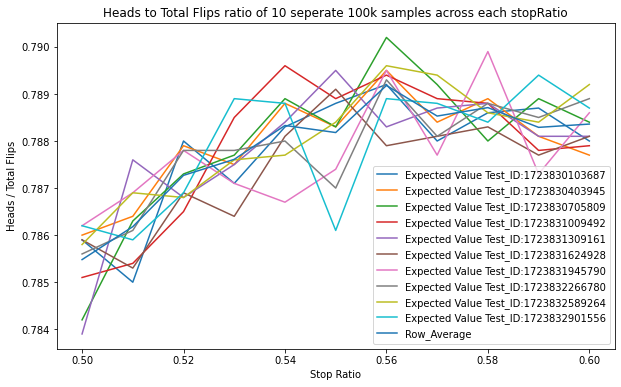

In [217]:
df_all_results.plot(kind='line',figsize=(10,6),title='Heads to Total Flips ratio of 10 seperate 100k samples across each stopRatio',xlabel='Stop Ratio',ylabel = 'Heads / Total Flips')

<AxesSubplot:title={'center':'Heads to Total Flips ratio of 1M samples across each stopRatio'}, xlabel='Stop Ratio', ylabel='Heads / Total Flips'>

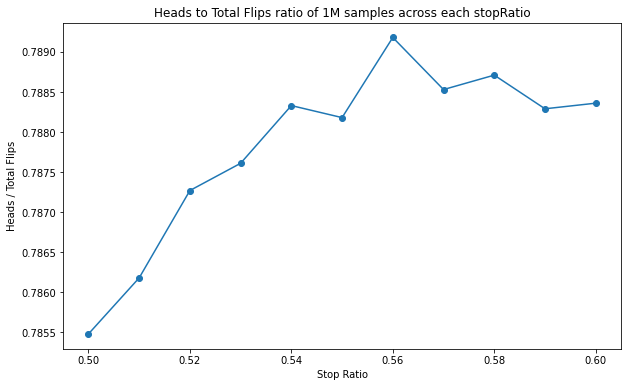

In [218]:
df_all_results['Row_Average'] = df_all_results.mean(axis=1)

# Step 2: Plot the averages
df_all_results['Row_Average'].plot(kind='line', figsize=(10, 6), marker='o', title='Heads to Total Flips ratio of 1M samples across each stopRatio',xlabel='Stop Ratio',ylabel = 'Heads / Total Flips')

# Findings

It appears that we can find a new optimal strategy for this game that I find surprising: <br>
- We only accept a ratio of better than 56% heads/total flips to stop

- The best long run result I was able to achieve was 78.9% heads/total flips ratio across 1M simulations!

# Future Work

This was a naive method only considering that there has to be some constant ratio of heads/total flips at which we accept it. I also however could forsee a situation where our heads/total flips ratio might want to be lower or higher. <br> <br>
An example of this might be: <br><br> we are 1M flips out and our current ratio is 52% this might be considered good since our variance per flip is extremely low and our long run expectancy is 50%. Versus if we are currently in the start and have only flipped 25 times so far and our ratio is 52% (13 heads/25 flips) we might be more inclined to want a higher number since our variance per flip is much higher. <br>

This is just some initial thoughts by me and am open to discussion! Feel free to reach out to [me](mailto:jcpearlson@gmail.com) if you have any comments or ideas on the idea of a constant/variable stopRatio or any other improvements!
